![](https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png "SciKit Learn")

##  Classification with [Decision Tree example from Scikit-Learn](https://scikit-learn.org/stable/modules/tree.html)

Modified for Interactive Notebook by Github@ChristinaB 5/15/2020

In [7]:
import sklearn
import sklearn.tree as tree
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor, export_graphviz
from sklearn.externals.six import StringIO  
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import graphviz
import sqlite3
import pydotplus
import pandas as pd
from IPython.display import Image  

In [8]:

# Create your connection.
#run = 'fast_dhsvm_pnnlNov2006_CA'
#connection = sqlite3.connect(run+'.db')
#simulations = pd.read_sql_query("SELECT * FROM " +run, connection)

run = 'fast_dhsvm_pnnlWY2009_592_cormet'
cnx = sqlite3.connect(run+'.db')
simulations = pd.read_sql_query("SELECT * FROM " +run, cnx)

#validation = pd.read_csv('validation.csv')
print("Number of Runs:", len(simulations))

Number of Runs: 594


In [9]:
DecisionTreeRegressor()

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [10]:
parameter_data = simulations[simulations.columns[simulations.columns.to_series().str.contains('par|like1')]]
features = list(parameter_data.columns[1:11])
print("* features:", features, sep="\n")

y = parameter_data["like1"]
X = parameter_data[features]
dt = DecisionTreeRegressor(min_samples_leaf=50, random_state=99,max_depth=6,criterion='mse')
dt.fit(X, y)

* features:
['parexponential_decrease_62', 'parlateral_conductivity_62', 'parexponent']


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=50, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=99, splitter='best')

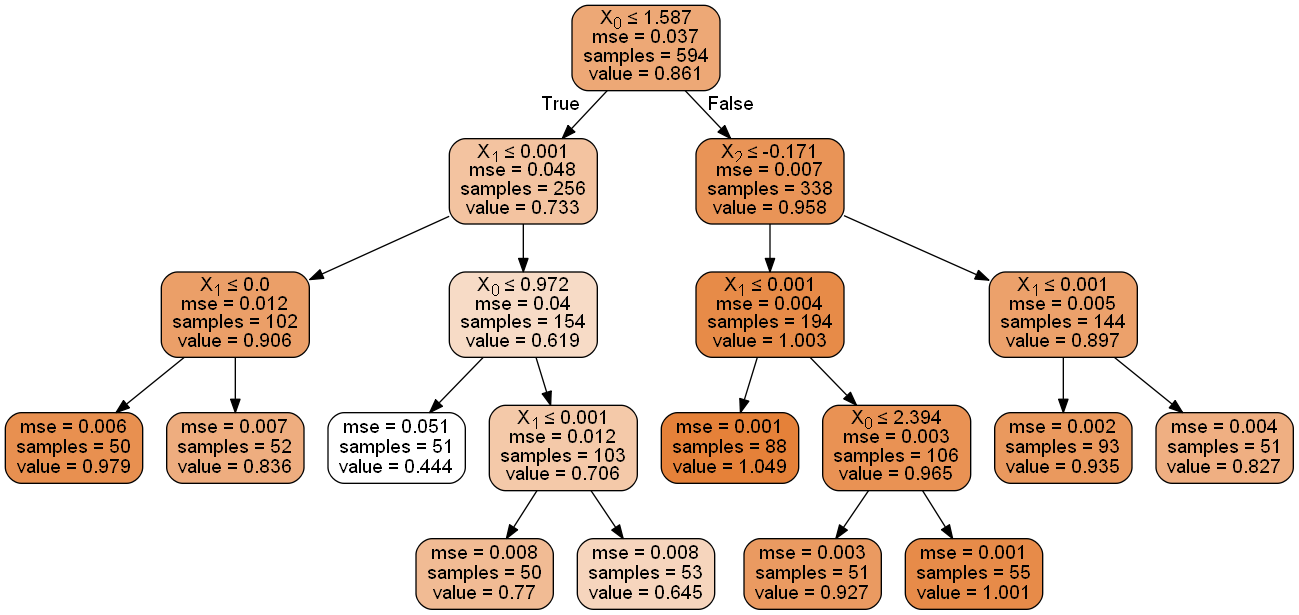

In [11]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

[Text(109.85625, 195.696, 'X[0] <= 0.769\nmse = 0.037\nsamples = 594\nvalue = 0.861'),
 Text(41.85, 152.208, 'X[0] <= 0.588\nmse = 0.033\nsamples = 146\nvalue = 0.59'),
 Text(20.925, 108.72, 'mse = 0.033\nsamples = 50\nvalue = 0.394'),
 Text(62.775000000000006, 108.72, 'mse = 0.003\nsamples = 96\nvalue = 0.693'),
 Text(177.8625, 152.208, 'X[0] <= 0.941\nmse = 0.007\nsamples = 448\nvalue = 0.949'),
 Text(104.625, 108.72, 'X[0] <= 0.862\nmse = 0.002\nsamples = 198\nvalue = 0.869'),
 Text(83.7, 65.232, 'mse = 0.001\nsamples = 81\nvalue = 0.822'),
 Text(125.55000000000001, 65.232, 'X[0] <= 0.898\nmse = 0.001\nsamples = 117\nvalue = 0.902'),
 Text(104.625, 21.744, 'mse = 0.0\nsamples = 52\nvalue = 0.879'),
 Text(146.475, 21.744, 'mse = 0.0\nsamples = 65\nvalue = 0.92'),
 Text(251.10000000000002, 108.72, 'X[0] <= 1.016\nmse = 0.002\nsamples = 250\nvalue = 1.013'),
 Text(209.25, 65.232, 'X[0] <= 0.978\nmse = 0.0\nsamples = 133\nvalue = 0.977'),
 Text(188.32500000000002, 21.744, 'mse = 0.0\nsa

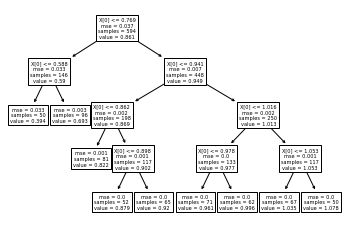

In [12]:
tree.plot_tree(dt.fit(parameter_data, parameter_data["like1"])) 

In [13]:

## Test with Iris data
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
print("Wait. What is the 'clf' variable?  It's a classifer; it's an instance; it's a set of input parameters.")
print(clf)

Wait. What is the 'clf' variable?  It's a classifer; it's an instance; it's a set of input parameters.
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [15]:
iris=load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [16]:
X, y = load_iris(return_X_y=True)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

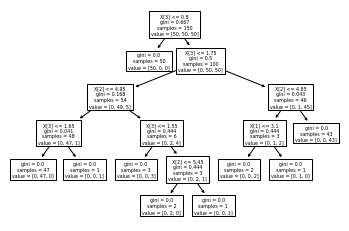

In [17]:
tree.plot_tree(clf.fit(iris.data, iris.target)) 

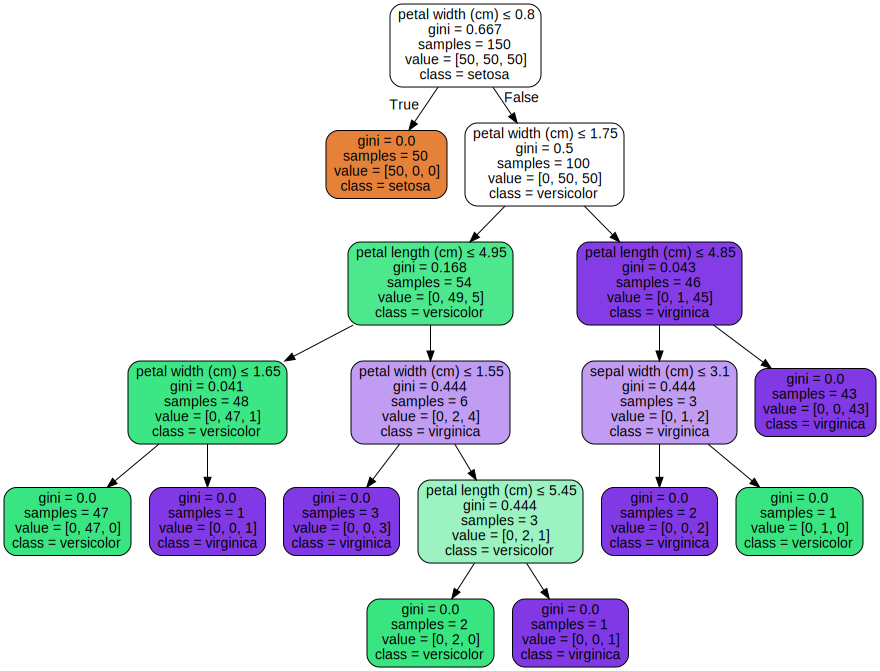

In [18]:
 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
#graph.render("iris") 
dot_data = tree.export_graphviz(clf, out_file=None, 
                          feature_names=iris.feature_names,  
                          class_names=iris.target_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

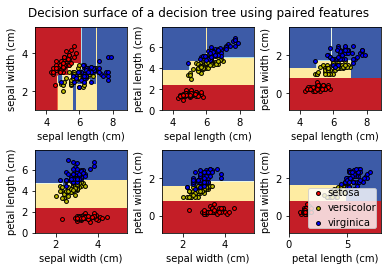

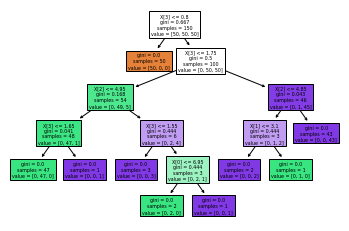

In [19]:
#import numpy as np
#import matplotlib.pyplot as plt

#from sklearn.datasets import load_iris
#from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()

In [29]:

print('The scikit-learn version is {}.'.format(sklearn.__version__))
print('The graphviz version is {}.'.format(graphviz.__version__))
print('The matplotlib version is {}.'.format(matplotlib.__version__))
print('The numpy version is {}.'.format(np.__version__))
print('The pydotplus version is pydotplus==2.0.2)')
print('The SQLAlchemy version is "SQLAlchemy==1.3.13"')
print('The ipython version is "ipython==7.12.0"')        
print('The pandas version is {}.'.format(pd.__version__))

The scikit-learn version is 0.22.1.
The graphviz version is 0.13.2.
The matplotlib version is 3.1.3.
The numpy version is 1.18.1.
The pydotplus version is pydotplus==2.0.2)
The SQLAlchemy version is "SQLAlchemy==1.3.13"
The ipython version is "ipython==7.12.0"
The pandas version is 1.0.1.
